## Erkunden des Zeitungskorpus mit NLTK

Link zu NLTK-Buch: http://www.nltk.org/book/

Steven Bird, Ewan Klein, Edward Loper: Natural Language Processing with Python.  Analyzing Text with the Natural Language Toolkit

Einlesen des Korpus

In [2]:
import nltk
from nltk.corpus import PlaintextCorpusReader
import matplotlib.pyplot as plt
%matplotlib inline


In [4]:
corpus_root = r"C:\Users\Martin\sciebo\Documents\MeineJupyterNotebooks\zefys-scraper-version-2\data_PC_txt_V3" # Verzeichnis mit den Plain-Text-Dateien
wordlist = PlaintextCorpusReader(corpus_root, '.*')
wordlist.fileids()[:10] # ersten 10 fileids

['1863-07-01_01.txt',
 '1863-07-01_02.txt',
 '1863-07-01_03.txt',
 '1863-07-01_04.txt',
 '1863-07-01_05.txt',
 '1863-07-01_06.txt',
 '1863-07-01_07.txt',
 '1863-07-01_08.txt',
 '1863-07-01_09.txt',
 '1863-07-08_01.txt']

In [5]:
text = wordlist.words() # teilt PlainTextCorpusReader-Objekt in Wörter auf

In [42]:
len(text)

5244163

In [43]:
text.count('Bismarck') # zählt Suchwort

2434

In [6]:
textlist = nltk.Text(text) # umwandeln in NLTK-Objekt

## Funktionen zur Vielfalt des Vokabulars und zu den relativen Häufigkeiten

In [27]:
def lexical_diversity(text):
    '''Returns lexical diversity'''
    return len(set(text)) / len(text)

In [28]:
lexical_diversity(textlist)

0.019853501883904067

In [29]:
def percentage(count, total):
    '''Returns conditional Frequency'''
    return 100 * count / total

In [30]:
percentage(textlist.count('Bismarck'), len(textlist))

0.04641350774184555

## eingebaute NLTK-Funktionen

In [37]:
textlist.concordance('Bismarck') # KWIC

Displaying 25 of 2434 matches:
 des Staatsministeriums , Herr von Bismarck , mit welchem Se . Majestät täglic
 des Staatsministeriums , Herr v . Bismarck , bleibt noch in Karlsbad bis zum 
tein zu begeben , während Herr von Bismarck ebenfalls eine Badereise antritt .
tät , der Minister - Präsident v . Bismarck - Schönhausen , so wie die hier an
t . Der Herr Ministerpräsident v . Bismarck war kurz vor der Abreise Sr . Maje
 der Herr Minister - Präsident v . Bismarck , so wie der Herr Kriegsminister v
 des Herrn Ministerpräsidenten v . Bismarck über Salzburg und München nach dem
 des Herrn Ministerpräsidenten v . Bismarck über Salzburg und München nach dem
 des Ministerpräsidenten Herrn v . Bismarck in bestem Wohlsein in Baden - Bade
 der Minister - Präsident Herr v . Bismarck . Se . Majestät erfreut sich augen
 der Minister - Präsident Herr v . Bismarck . Se . Majestät erfreut sich augen
önigs beherzigen ! Das Ministerium Bismarck . In diesen Tagen war es ein Jahr 
gen war es ein Jahr ,

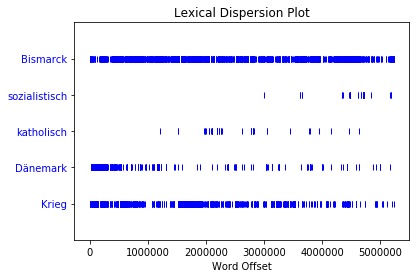

In [38]:
textlist.dispersion_plot(['Bismarck', 'sozialistisch', 'katholisch', 'Dänemark', 'Krieg'])

In [30]:
textlist.similar('Bismarck')

preußen der roon oesterreich und ihnen moltke dem rußland bennigsen
ihm neuem paris sachsen puttkamer den frankreich mark uns dänemark


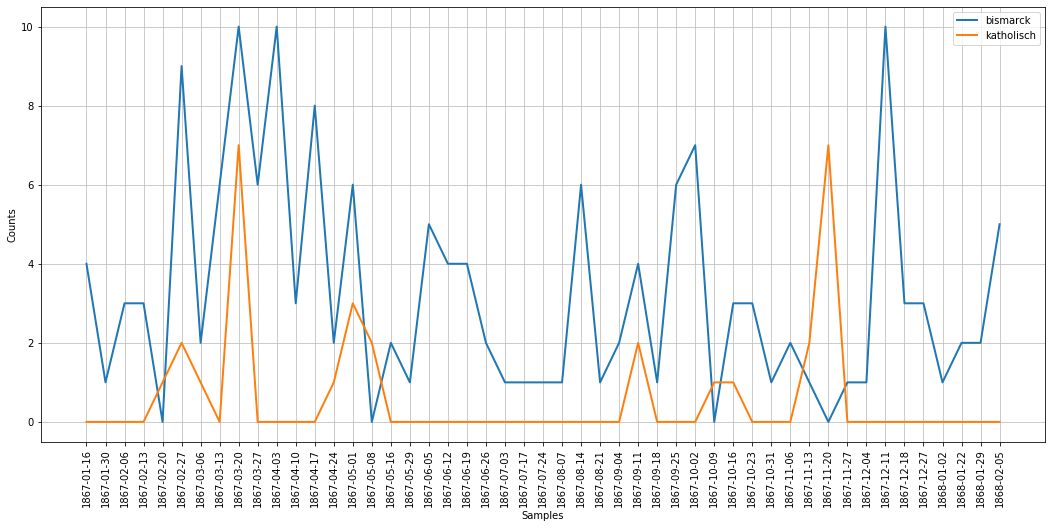

In [35]:
# nachfolgende Abfrage zu Conditional Frequency distribution ist  nicht  konsistent und funktionier noch nicht richtig!!!

fig, ax = plt.subplots(figsize=(18,8))

cfd = nltk.ConditionalFreqDist(
    (target, fileid[:10]) # gibt das Label der xticks an
    for fileid in wordlist.fileids()[1500:2000] # Zahl gibt Index der Dateien an, damit kann man indirekt auf das Datum zugreifen
    for w in wordlist.words(fileid)
    for target in ["bismarck", "sozialisten", "katholisch"]
    if w.lower().startswith(target))

cfd.plot()
